#Load Processed Data / Model Output

In [2]:
import pandas as pd

df = pd.read_csv("test_hourly.csv", index_col=0, parse_dates=True)
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
08-02-2007 17:00,0.261440,0.060083,0.577343,0.246081,0.000000,0.000000,0.927240
08-02-2007 18:00,0.262006,0.156011,0.405402,0.254248,0.000000,0.015814,0.445430
08-02-2007 19:00,0.534676,0.371805,0.377008,0.526545,0.435426,0.000000,0.000000
08-02-2007 20:00,0.468850,0.078306,0.410136,0.453827,0.009196,0.002081,0.797693
08-02-2007 21:00,0.426250,0.141457,0.474180,0.413911,0.211116,0.014565,0.228926


#Energy Trend Visualization

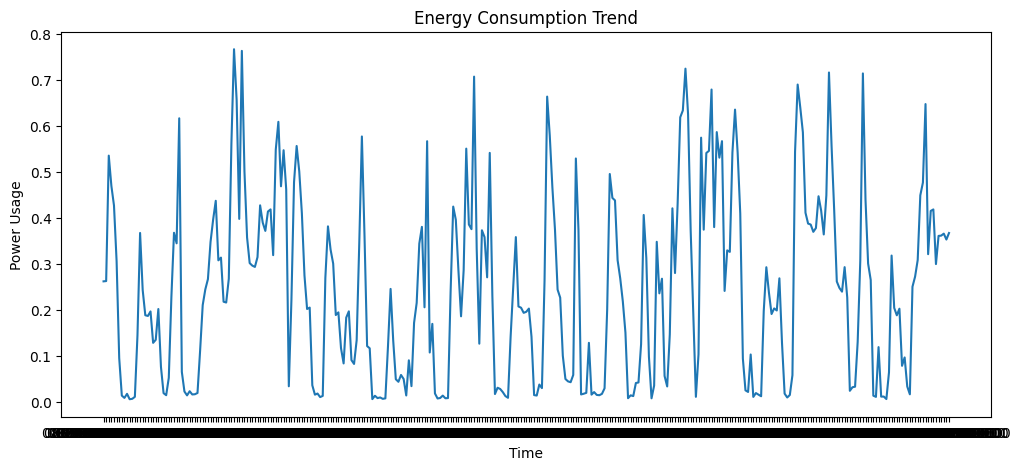

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Global_active_power'])
plt.title("Energy Consumption Trend")
plt.xlabel("Time")
plt.ylabel("Power Usage")
plt.show()


#Daily Average Consumption

In [9]:
print(df.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


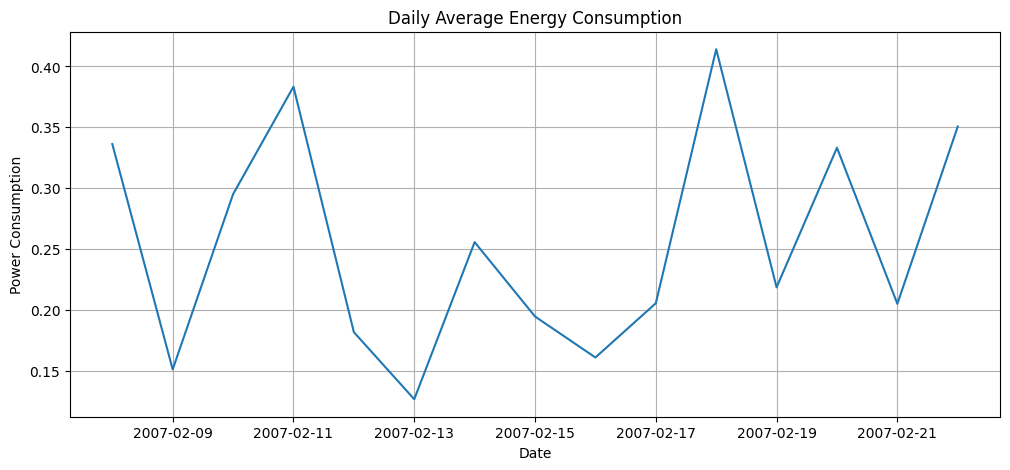

In [13]:

df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')

df = df.dropna()

daily_avg = df.resample('D').mean()

plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['Global_active_power'])
plt.title("Daily Average Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.grid(True)
plt.show()


#Actual vs Predicted Comparison

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


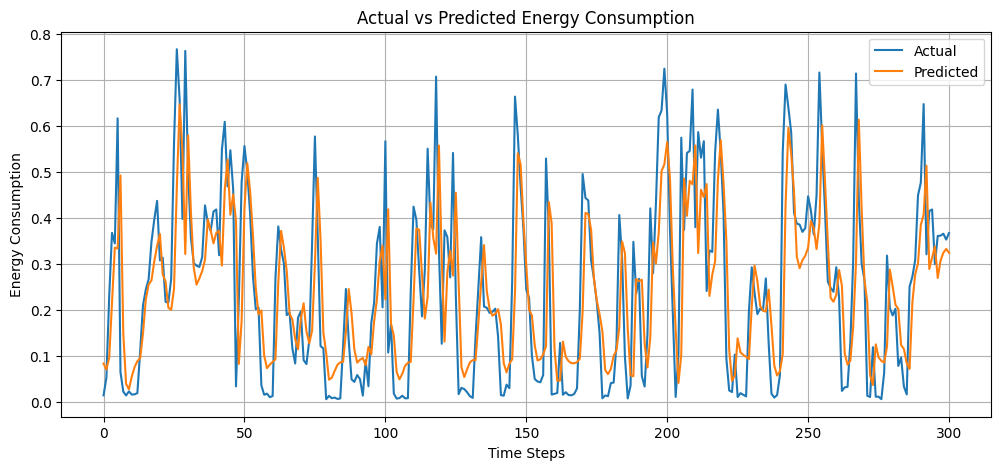

In [19]:

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

df = pd.read_csv("test_hourly.csv", index_col=0)

df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')
df = df.dropna()

actual_values = df['Global_active_power'].values

model = load_model("energy_lstm_model.h5", compile=False)

window = 24
X = []
for i in range(window, len(actual_values)):
    X.append(actual_values[i-window:i])

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

predicted_values = model.predict(X)

actual_values = actual_values[window:]

plt.figure(figsize=(12,5))
plt.plot(actual_values, label="Actual")
plt.plot(predicted_values, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption")
plt.grid(True)
plt.show()


#Smart Suggestions Module

In [20]:
def energy_tip(value):
    if value > 0.7:
        return "High consumption → Reduce AC/heater usage."
    elif value > 0.4:
        return "Moderate consumption → Monitor devices."
    else:
        return "Efficient energy usage."

df['suggestion'] = df['Global_active_power'].apply(energy_tip)
df[['Global_active_power','suggestion']].head()


,Global_active_power,suggestion
timestamp,,
2007-02-08 17:00:00,0.261440,Efficient energy usage.
2007-02-08 18:00:00,0.262006,Efficient energy usage.
2007-02-08 19:00:00,0.534676,Moderate consumption → Monitor devices.
2007-02-08 20:00:00,0.468850,Moderate consumption → Monitor devices.
2007-02-08 21:00:00,0.426250,Moderate consumption → Monitor devices.
